Chargement des données

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
winequality = pd.read_csv("C:/Users/Administrateur/Documents/M2i_CDSD_TDTP/scikit_learn/exos/winequality-red.csv", quotechar="\"", sep=";")

1. Exploration : Analyser les valeurs manquantes et les distributions

In [46]:
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [49]:
def analyse_missing_date(df: pd.DataFrame) -> pd.DataFrame:
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)
    df_missing = pd.DataFrame({
        "Colonnes": missing.index,
        "Valeurs manquantes": missing.values,
        "Pourcentages": missing_pct.values
    })
    df_missing = df_missing[df_missing["Valeurs manquantes"] > 0].sort_values("Pourcentages", ascending=False)
    return df_missing

missing_data = analyse_missing_date(winequality)

if len(missing_data) == 0:
    print("Aucune donnée manquante")
else:
    missing_data.head(len(winequality.columns))

Aucune donnée manquante


Text(0, 0.5, 'Nombre de vin')

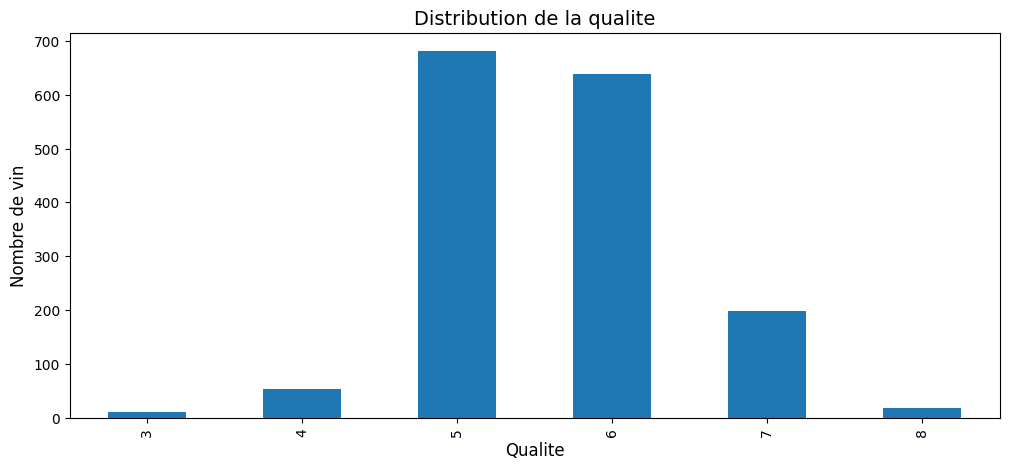

In [50]:
plt.figure(figsize=(12,5))
winequality["quality"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution de la qualite", fontsize=14)
plt.xlabel("Qualite", fontsize=12)
plt.ylabel("Nombre de vin", fontsize=12)

La répartition des vins par qualité des vins est inégale.

In [51]:
df_corr = winequality.loc[:, winequality.columns != "quality"].copy()
mat_corr = df_corr.corr()

<Axes: title={'center': 'Matrice de corrélation - Comportement client E-Commerce'}>

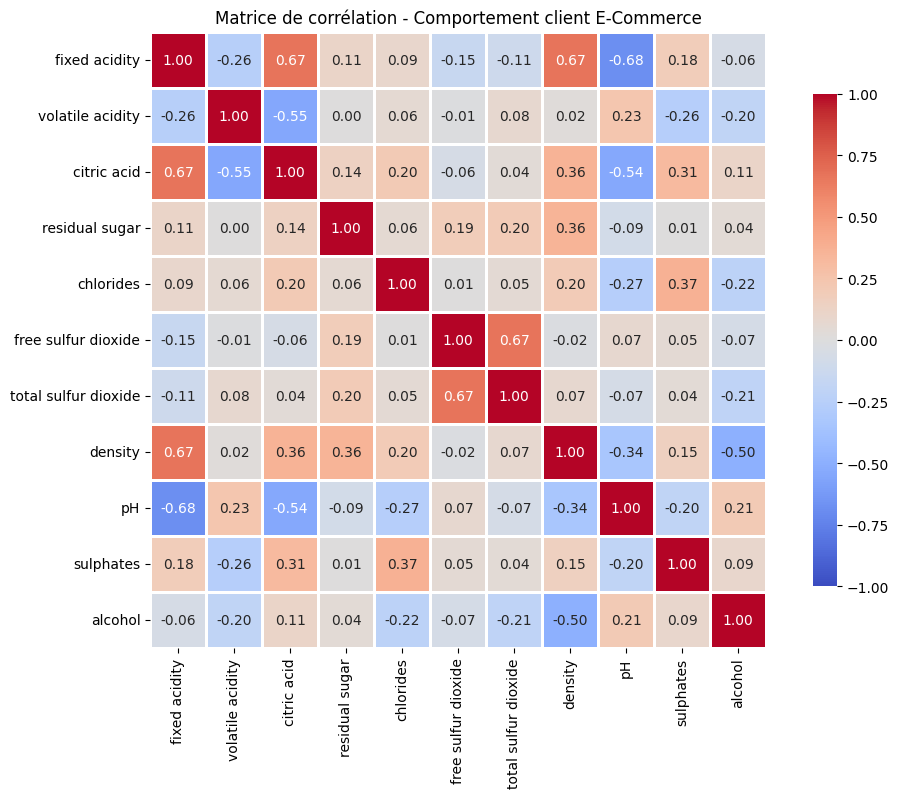

In [52]:
plt.figure(figsize=(12,8))
plt.title("Matrice de corrélation - Comportement client E-Commerce")

sns.heatmap(
    mat_corr,
    annot=True, # Afficher les valeurs
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    square=True, # Cases carrées
    linewidths=1, # Séparation entre les cases
    cbar_kws={"shrink": 0.8}, # Barre de couleur
    fmt=".2f", # Arrondir les valeurs à 2 décimales
)

2. Ajouter une nouvelle variable binaire : bon vin (quality >= 6) vs mauvais vin (quality < 6). Cette variable sera la target

In [53]:
winequality_fit_eng = winequality.copy()
winequality_fit_eng["target"] = (winequality_fit_eng["quality"] >= 6).astype(int)

print(winequality_fit_eng["target"].value_counts())

target
1    855
0    744
Name: count, dtype: int64


La répartition des vins par target est légérement inégale.

3. Préprocessing : Créer un pipeline de prétraitement

In [104]:
features_to_keep = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target = "target"

X = winequality_fit_eng[features_to_keep].copy()
y = winequality_fit_eng[target].copy()

numeric_features = X.select_dtypes(include=["int", "float"]).columns.to_list()

print(f"Variables numériques : {numeric_features}")

Variables numériques : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


4. Split : Séparer en train/test (80/20)

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
    shuffle=True,
)

5. Pipeline : Construire un pipeline complet avec LogisticRegression

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

ml_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(random_state=42, max_iter=1_000)),
    ]
)

# Entrainement du modèle sur les données d'entraînement
ml_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

6. Évaluation : Calculer l'accuracy

In [107]:
from sklearn.metrics import accuracy_score

# Prédictions sur les données de train/test
y_pred_test = ml_pipeline.predict(X_test)
y_pred_train = ml_pipeline.predict(X_train)

# Calcul des taux de bonnes prédictions
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy : {accuracy_test:.2%}")
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy : {accuracy_train:.2%}")

Accuracy : 74.06%
Accuracy : 74.28%
